## This notebook tests the implementation of PyTket library as a backend on OpenQAOA
* In OpenQAOA, PyTket is primarily used for circuit compilation, mapping and optimization of logically defined QAOA circuits to physical circuits implementable on devices with limited connectivity. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from openqaoa.problems.problem import MinimumVertexCover
from pytket.circuit.display import render_circuit_jupyter

In [3]:
mvc_random = MinimumVertexCover.random_instance(n_nodes=6, edge_probability=0.9)
mvc_qubo = mvc_random.get_qubo_problem()

In [4]:
from openqaoa.utilities import X_mixer_hamiltonian
cost_hamiltonian = mvc_qubo.hamiltonian
mixer_hamiltonian = X_mixer_hamiltonian(n_qubits=cost_hamiltonian.n_qubits)

In [5]:
from openqaoa.qaoa_parameters import QAOACircuitParams
circuit_params = QAOACircuitParams(cost_hamiltonian, mixer_hamiltonian, p=1)
circuit_params

Circuit Parameters:
	p: 1
	register: [0, 1, 2, 3, 4, 5]

Cost Hamiltonian:
	cost_qubits_singles: [PauliOp(Z,(0,)), PauliOp(Z,(1,)), PauliOp(Z,(2,)), PauliOp(Z,(3,)), PauliOp(Z,(4,)), PauliOp(Z,(5,))]
	cost_single_qubit_coeffs: [12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
	cost_qubits_pairs: [PauliOp(ZZ,(0, 1)), PauliOp(ZZ,(0, 2)), PauliOp(ZZ,(0, 3)), PauliOp(ZZ,(0, 4)), PauliOp(ZZ,(0, 5)), PauliOp(ZZ,(1, 2)), PauliOp(ZZ,(1, 3)), PauliOp(ZZ,(1, 4)), PauliOp(ZZ,(1, 5)), PauliOp(ZZ,(2, 3)), PauliOp(ZZ,(2, 4)), PauliOp(ZZ,(2, 5)), PauliOp(ZZ,(3, 4)), PauliOp(ZZ,(3, 5)), PauliOp(ZZ,(4, 5))]
	cost_pair_qubit_coeffs: [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]

Mixer Hamiltonian:
	mixer_qubits_singles: [PauliOp(X,(0,)), PauliOp(X,(1,)), PauliOp(X,(2,)), PauliOp(X,(3,)), PauliOp(X,(4,)), PauliOp(X,(5,))]
	mixer_single_qubit_coeffs: [-1, -1, -1, -1, -1, -1]
	mixer_qubits_pairs: []
	mixer_pair_qubit_coeffs: []

In [6]:
from openqaoa.qaoa_parameters import create_qaoa_variational_params

In [7]:
params = create_qaoa_variational_params(circuit_params, params_type='standard', init_type='rand')
params

Standard Parameterisation:
	p: 1
Variational Parameters:
	betas: [1.83297626]
	gammas: [0.16366164]

In [8]:
from openqaoa.devices import create_device, DevicePyTket
ibmq_qpu_credentials ={
    "api_token": "34edbe2020d32da16c0b6a743d462b11a189cbe4e8c000de677fb2a6ca2e0d527c64d14fb3de6c07a6ae3f6897aa5b05a21f948f71cd3f60453aa7bdb29c3410",
    "hub": "ibm-q-startup",
    "group": "entropica-labs",
    "project": "benchmarking-tes"
}
qiskit_device = create_device(location='ibmq', name='ibmq_jakarta', **ibmq_qpu_credentials)

In [24]:
from openqaoa.backends import QAOAPyTketBackend, QAOAQiskitQPUBackend

In [25]:
backend = QAOAPyTketBackend(circuit_params, qiskit_device, n_shots=1000, prepend_state=None, append_state=None, init_hadamard=True, cvar_alpha=1)

In [26]:
render_circuit_jupyter(backend.parametric_circuit)

In [27]:
render_circuit_jupyter(backend.optimized_circuit)

In [30]:
params_assigned_circuit = backend.qaoa_circuit(params)
render_circuit_jupyter(params_assigned_circuit)

In [29]:
render_circuit_jupyter(backend.optimized_circuit)

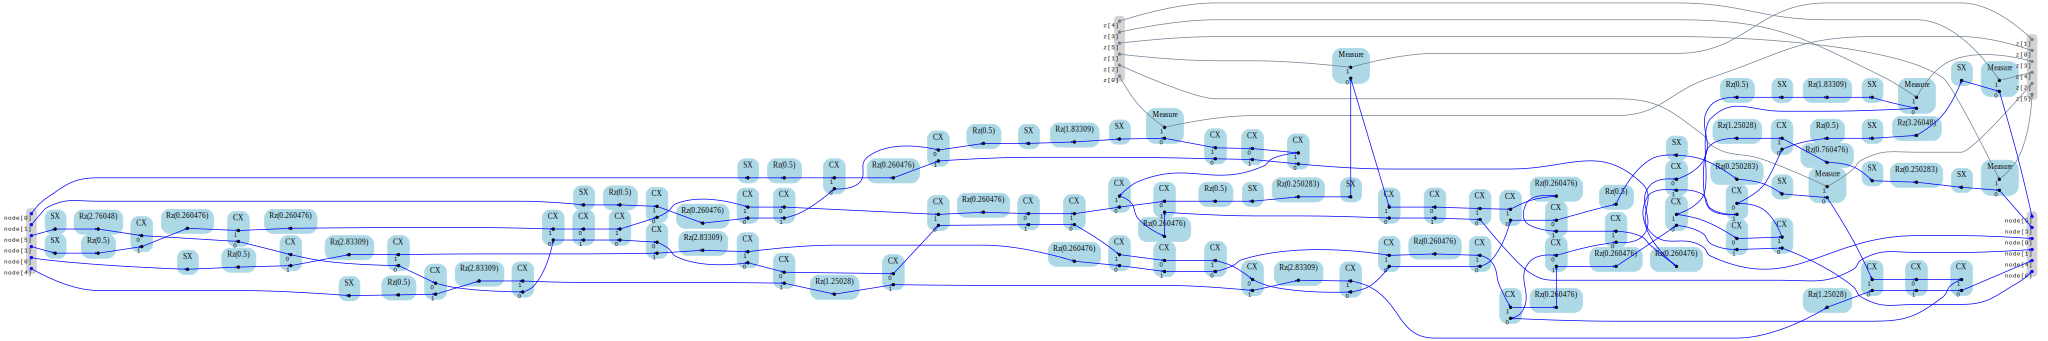

In [32]:
from pytket.utils import Graph
Graph(params_assigned_circuit).get_DAG()

In [ ]:
counts = backend.get_counts(params)

Job Status: job is queued (2)     